# Application of our Workflow onto two datasets

In [1]:
from functions import clean_file, normalize_data, train_test, trainSVMlinear,getDataLabels,confusionMatrix,testSVM, validateModel
import numpy as np
from matplotlib import pyplot as plt

In [2]:
#
BANKNOTE = "./data_banknote_authentication.txt"
KIDNEY = "./kidney_disease.csv"

## 1. Load and clean data
* Load and clean data
* Center and normalize data

In [3]:
banknote = clean_file(BANKNOTE)
kidney = clean_file(KIDNEY)

---START CLEANING :  ./data_banknote_authentication.txt ---
Toutes les valeurs manquantes ont été remplacées
La table est normalisée
---END CLEANING : ./data_banknote_authentication.txt ---

---START CLEANING :  ./kidney_disease.csv ---
Toutes les valeurs manquantes ont été remplacées
La table est normalisée
---END CLEANING : ./kidney_disease.csv ---



In [4]:
banknote.describe()

,0,1,2,3,4
count,1.372000e+03,1372.000000,1372.000000,1.372000e+03,1372.000000
mean,8.286213e-17,0.000000,0.000000,-5.437827e-17,0.444606
std,1.000000e+00,1.000000,1.000000,1.000000e+00,0.497103
min,-2.629778e+00,-2.674276,-1.550738,-3.501427e+00,0.000000
25%,-7.762644e-01,-0.618593,-0.689694,-5.815259e-01,0.000000
50%,2.196622e-02,0.067694,-0.181205,2.879594e-01,0.000000
75%,8.399364e-01,0.833572,0.413367,7.550960e-01,1.000000
max,2.248188e+00,1.879223,3.835187,1.733048e+00,1.000000


In [5]:
kidney.describe()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
count,400.000000,4.000000e+02,4.000000e+02,4.000000e+02,400.000000,4.000000e+02,400.000000,400.000000,400.000000,400.000000,...,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,199.500000,5.062617e-16,7.460699e-16,2.273737e-15,0.000000,0.000000e+00,0.117500,0.190000,0.105000,0.055000,...,15.722500,25.900000,14.690000,0.632500,0.65750,0.085000,0.205000,0.190000,0.150000,0.375000
std,115.614301,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,0.322418,0.392792,0.306937,0.228266,...,10.905863,23.970533,16.030325,0.482728,0.47514,0.279231,0.404207,0.392792,0.357519,0.484729
min,0.000000,-2.915079e+00,-1.964120e+00,-2.310870e+00,-0.799289,-4.372493e-01,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,99.750000,-5.586683e-01,-4.800333e-01,-4.484564e-01,-0.799289,-4.372493e-01,0.000000,0.000000,0.000000,0.000000,...,9.000000,5.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,199.500000,1.482550e-01,1.310051e-01,0.000000e+00,-0.013321,-4.372493e-01,0.000000,0.000000,0.000000,0.000000,...,12.000000,17.000000,8.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,299.250000,7.373578e-01,2.620102e-01,4.827501e-01,0.772646,-5.392118e-17,0.000000,0.000000,0.000000,0.000000,...,23.000000,43.000000,26.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,1.000000
max,399.000000,2.269025e+00,7.682446e+00,1.413957e+00,3.130547,4.419539e+00,1.000000,1.000000,1.000000,1.000000,...,41.000000,88.000000,47.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


## 2. Split data into train and test

In [6]:
KIDNEY_DATA,KIDNEY_LABEL = getDataLabels(kidney)
BANKNOTE_DATA,BANKNOTE_LABEL = getDataLabels(banknote)

In [7]:
K_X_train,K_X_test,K_y_train,K_y_test = train_test(KIDNEY_DATA,KIDNEY_LABEL,.3,False)

## 3. Train models

In [8]:
linearSVM = trainSVMlinear(K_X_train,K_y_train)

## 4. Test models

In [9]:
linearSVMprediction = testSVM(linearSVM,K_X_test)

## 5. Validate models

Your model has an accuracy of : 100.0%
Your model's F1 score = 1.0 


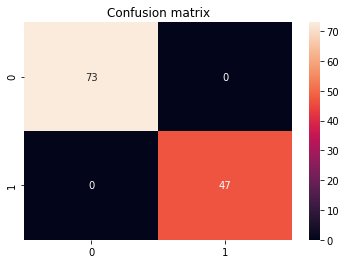

In [10]:
ax = confusionMatrix(K_y_test,linearSVMprediction,title="Confusion matrix")
validateModel(K_y_test,linearSVMprediction)